<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Gaussian_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2   setoa
1                4.9               3.0  ...               0.2   setoa
2                4.7               3.2  ...               0.2   setoa
3                4.6               3.1  ...               0.2   setoa
4                5.0               3.6  ...               0.2   setoa

[5 rows x 5 columns]


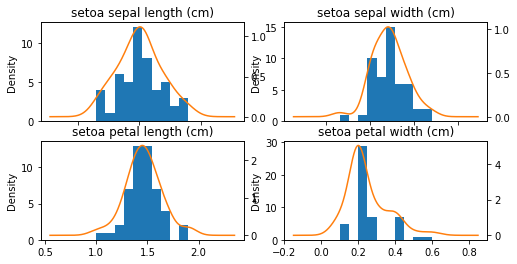

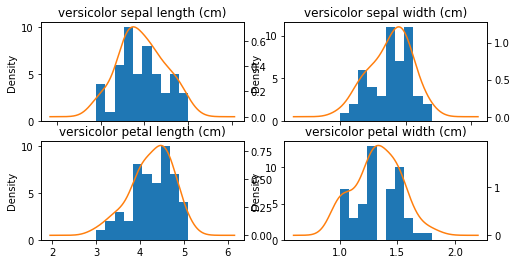

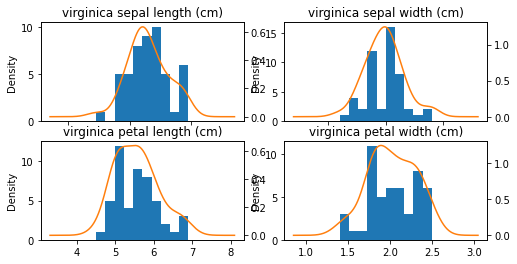

performance=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86         7
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

accuracy= 0.9333333333333333


In [5]:
import pandas as pd #데이터 분석을 위한 pandas
from sklearn.datasets import load_iris#붓꽃데이터 생성
from sklearn.model_selection import train_test_split#학습데이터와 테스트데이터 분리
from sklearn.naive_bayes import GaussianNB#가우시안 단순  분류기
from sklearn import metrics#분류 성능 평가
from sklearn.metrics import accuracy_score#정확도 평가
import matplotlib.pyplot as plt#차트 사용

dataset=load_iris()#샘플 데이터 생성
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)#feature_names를 레코드로 가지는 데이터 프레임 생성
df['target']=dataset.target#target을 레코드로 갖는 데이터프레임 생성
df.target=df.target.map({0:'setoa',1:'versicolor',2:'virginica'})# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
print(df.head())

def showDist(r,c,idx,category,attr):
  data_df=df[df.target==category]#0.0, 1.0, 2.0으로 표현된 label
  plt.subplot(r,c,idx)#r개의 행,c개의 열
  ax=data_df[attr].plot(kind='hist')#히스토그램으로 표현
  data_df[attr].plot(kind='kde',ax=ax,secondary_y=True,title=category+' '+attr,figsize=(8,4))#커넬 밀도 그래프,이름 설정,크기설정,다른축 반환허용

showDist(2,2,1,'setoa','sepal length (cm)')#category=setoa,2행2열 첫번째
showDist(2,2,2,'setoa','sepal width (cm)')#category=setoa,2행2열 두번째
showDist(2,2,3,'setoa','petal length (cm)')#category=setoa,2행2열 세번째
showDist(2,2,4,'setoa','petal width (cm)')#category=setoa,2행2열 네번째
plt.show()

showDist(2,2,1,'versicolor','sepal length (cm)')#category=versicolor,2행2열 첫번째
showDist(2,2,2,'versicolor','sepal width (cm)')#category=versicolor,2행2열 두번째
showDist(2,2,3,'versicolor','petal length (cm)')#category=versicolor,2행2열 세번째
showDist(2,2,4,'versicolor','petal width (cm)')#category=versicolor,2행2열 네번째
plt.show()

showDist(2,2,1,'virginica','sepal length (cm)')#category=virginica,2행2열 첫번째
showDist(2,2,2,'virginica','sepal width (cm)')#category=virginica,2행2열 두번째
showDist(2,2,3,'virginica','petal length (cm)')#category=virginica,2행2열 세번째
showDist(2,2,4,'virginica','petal width (cm)')#category=virginica,2행2열 네번째
plt.show()

X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)#X_train,y_train은 80%,X_test,y_test는 20%로 나눔
model=GaussianNB()#가우시안 단순 베이즈 분류
model.fit(X_train,y_train)#X_train,y_train의 평균과 표준편차 구함

predicted_y=model.predict(X_test)#X_test사용 예측값 계산
performance=metrics.classification_report(y_test,predicted_y)#정밀도,재현율,F1점수,평균값 구함
print('performance=',performance)
accuracy=accuracy_score(y_test,predicted_y)#정확도 측정
print('accuracy=',accuracy)